<a href="https://colab.research.google.com/github/PunyapaCH/intern/blob/main/drug_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Prediction Using Dicision Tree Model

by Punyapa Charoensuk

---

#  Exploration Data and Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
drug_train = pd.read_excel('drug.xlsx', sheet_name='Drug_Train')
drug_test = pd.read_excel('drug.xlsx', sheet_name='Drug_Test')
unseen = pd.read_excel('drug.xlsx', sheet_name='Drug_Unseen')
drug_train.dtypes

,0
ID,int64
AGE,int64
SEX,object
BP,object
CHOLES,object
NA,float64
K,float64
DRUG,object


In [3]:
drug_train['AGE'] = drug_train['AGE'].astype(object)
drug_test['AGE'] = drug_test['AGE'].astype(object)
unseen['AGE'] = unseen['AGE'].astype(object)

In [4]:
drug_train.dtypes

,0
ID,int64
AGE,object
SEX,object
BP,object
CHOLES,object
NA,float64
K,float64
DRUG,object


In [5]:
drug_train.drop('ID', axis=1, inplace=True)
drug_test.drop('ID', axis=1, inplace=True)
unseen.drop('ID', axis=1, inplace=True)

In [6]:
## function ที่มีไว้ print head() ของแต่ละ df พร้อม ๆ กัน

def PrintHead():
  print("Drug_Train\n")
  print(drug_train.head())

  print("\nDrug_Test\n")
  print(drug_test.head())

  print("\nDrug_Unseen\n")
  print(unseen.head())

In [7]:
PrintHead()

Drug_Train

  AGE SEX      BP CHOLES        NA         K   DRUG
0  23   F    HIGH   HIGH  0.792535  0.031258  drugY
1  47   M     LOW   HIGH  0.739309  0.056468  drugC
2  47   M     LOW   HIGH  0.697269  0.068944  drugC
3  28   F  NORMAL   HIGH  0.563682  0.072289  drugX
4  61   F     LOW   HIGH  0.559294  0.030998  drugY

Drug_Test

  AGE SEX      BP  CHOLES        NA         K   DRUG
0  57   M     LOW  NORMAL  0.536746  0.028061  drugY
1  49   F  NORMAL  NORMAL  0.694689  0.074055  drugX
2  74   M    HIGH    HIGH  0.715337  0.074773  drugB
3  49   M     LOW  NORMAL  0.625889  0.056828  drugX
4  65   F    HIGH  NORMAL  0.828898  0.026004  drugY

Drug_Unseen

  AGE SEX      BP  CHOLES        NA         K  DRUG
0  57   M     LOW  NORMAL  0.536746  0.028061   NaN
1  49   F  NORMAL  NORMAL  0.694689  0.074055   NaN
2  74   M    HIGH    HIGH  0.715337  0.074773   NaN
3  49   M     LOW  NORMAL  0.625889  0.056828   NaN
4  65   F    HIGH  NORMAL  0.828898  0.026004   NaN


## number of classes

In [8]:
print(drug_train["DRUG"].unique().tolist())
print(f'number of classes to be classified = {len(drug_train["DRUG"].unique())}')

['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
number of classes to be classified = 5


## proportions

In [9]:
class_proportions = drug_train['DRUG'].value_counts(normalize=True) * 100
class_proportions

,proportion
DRUG,
drugY,45.5
drugX,27.0
drugA,11.5
drugC,8.0
drugB,8.0


# Preprocessing

## Na_to_K

In [10]:
drug_train['Na_to_K'] = drug_train['NA'] / drug_train['K']
drug_test['Na_to_K'] = drug_test['NA'] / drug_test['K']
unseen['Na_to_K'] = unseen['NA'] / unseen['K']

In [11]:
drug_train.drop(['NA', 'K'], axis=1, inplace=True)
drug_test.drop(['NA', 'K'], axis=1, inplace=True)
unseen.drop(['NA', 'K'], axis=1, inplace=True)

In [12]:
PrintHead()

Drug_Train

  AGE SEX      BP CHOLES   DRUG    Na_to_K
0  23   F    HIGH   HIGH  drugY  25.354629
1  47   M     LOW   HIGH  drugC  13.092530
2  47   M     LOW   HIGH  drugC  10.113556
3  28   F  NORMAL   HIGH  drugX   7.797618
4  61   F     LOW   HIGH  drugY  18.042906

Drug_Test

  AGE SEX      BP  CHOLES   DRUG    Na_to_K
0  57   M     LOW  NORMAL  drugY  19.127829
1  49   F  NORMAL  NORMAL  drugX   9.380717
2  74   M    HIGH    HIGH  drugB   9.566782
3  49   M     LOW  NORMAL  drugX  11.013743
4  65   F    HIGH  NORMAL  drugY  31.875788

Drug_Unseen

  AGE SEX      BP  CHOLES  DRUG    Na_to_K
0  57   M     LOW  NORMAL   NaN  19.127829
1  49   F  NORMAL  NORMAL   NaN   9.380717
2  74   M    HIGH    HIGH   NaN   9.566782
3  49   M     LOW  NORMAL   NaN  11.013743
4  65   F    HIGH  NORMAL   NaN  31.875788


## Discretization

* Low: <= 10
* Medium: <= 20
* High: <= 30
* VeryHigh: <= 40

In [13]:
bins = [-float('inf'), 10, 20, 30, 40]
labels = ['Low', 'Medium', 'High', 'VeryHigh']

drug_train['na2k'] = pd.cut(drug_train['Na_to_K'], bins=bins, labels=labels, right=True)
drug_test['na2k'] = pd.cut(drug_test['Na_to_K'], bins=bins, labels=labels, right=True)
unseen['na2k'] = pd.cut(unseen['Na_to_K'], bins=bins, labels=labels, right=True)

drug_train.drop('Na_to_K', axis=1, inplace=True)
drug_test.drop('Na_to_K', axis=1, inplace=True)
unseen.drop('Na_to_K', axis=1, inplace=True)

In [14]:
PrintHead()

Drug_Train

  AGE SEX      BP CHOLES   DRUG    na2k
0  23   F    HIGH   HIGH  drugY    High
1  47   M     LOW   HIGH  drugC  Medium
2  47   M     LOW   HIGH  drugC  Medium
3  28   F  NORMAL   HIGH  drugX     Low
4  61   F     LOW   HIGH  drugY  Medium

Drug_Test

  AGE SEX      BP  CHOLES   DRUG      na2k
0  57   M     LOW  NORMAL  drugY    Medium
1  49   F  NORMAL  NORMAL  drugX       Low
2  74   M    HIGH    HIGH  drugB       Low
3  49   M     LOW  NORMAL  drugX    Medium
4  65   F    HIGH  NORMAL  drugY  VeryHigh

Drug_Unseen

  AGE SEX      BP  CHOLES  DRUG      na2k
0  57   M     LOW  NORMAL   NaN    Medium
1  49   F  NORMAL  NORMAL   NaN       Low
2  74   M    HIGH    HIGH   NaN       Low
3  49   M     LOW  NORMAL   NaN    Medium
4  65   F    HIGH  NORMAL   NaN  VeryHigh


# Model Construction

## One Hot Encoder

In [15]:
cols = ["SEX","BP","CHOLES","na2k"]

hot_train = pd.get_dummies(drug_train, columns = cols)
hot_test = pd.get_dummies(drug_test, columns = cols)
hot_unseen = pd.get_dummies(unseen, columns = cols)

'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['SEX', 'BP', 'CHOLES', 'na2k']
for i in cols:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    unseen[i] = le.transform(unseen[i])'''

## splt train test

In [16]:
X_train = hot_train.drop(['DRUG'], axis=1)
y_train = hot_train['DRUG']
X_test = hot_test.drop(['DRUG'], axis=1)
y_test = hot_test['DRUG']

hot_unseen.drop(['DRUG'], axis=1, inplace=True)

In [17]:
print(X_train.head())
print(X_test.head())
print(hot_unseen.head())

  AGE  SEX_F  SEX_M  BP_HIGH  BP_LOW  BP_NORMAL  CHOLES_HIGH  CHOLES_NORMAL  \
0  23   True  False     True   False      False         True          False   
1  47  False   True    False    True      False         True          False   
2  47  False   True    False    True      False         True          False   
3  28   True  False    False   False       True         True          False   
4  61   True  False    False    True      False         True          False   

   na2k_Low  na2k_Medium  na2k_High  na2k_VeryHigh  
0     False        False       True          False  
1     False         True      False          False  
2     False         True      False          False  
3      True        False      False          False  
4     False         True      False          False  
  AGE  SEX_F  SEX_M  BP_HIGH  BP_LOW  BP_NORMAL  CHOLES_HIGH  CHOLES_NORMAL  \
0  57  False   True    False    True      False        False           True   
1  49   True  False    False   False       True  

## Modeling

In [18]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
print(y_pred[0:])
print(y_test[0:])

['drugX' 'drugX' 'drugB' 'drugX' 'drugB' 'drugX' 'drugA' 'drugX' 'drugB'
 'drugX' 'drugA' 'drugY' 'drugX' 'drugB']
0     drugY
1     drugX
2     drugB
3     drugX
4     drugY
5     drugX
6     drugA
7     drugC
8     drugB
9     drugC
10    drugA
11    drugY
12    drugX
13    drugB
Name: DRUG, dtype: object


## the number of levels

In [20]:
print(f"Number of levels in tree = {classifier.get_depth()}")

Number of levels in tree = 3


## set of rules

In [21]:
X_train_encoded = pd.get_dummies(drug_train)
feature_names = X_train_encoded.columns
print("Features after Encoding :")
print(feature_names)

Features after Encoding :
Index(['AGE_15', 'AGE_16', 'AGE_17', 'AGE_18', 'AGE_19', 'AGE_20', 'AGE_21',
       'AGE_22', 'AGE_23', 'AGE_24', 'AGE_25', 'AGE_26', 'AGE_28', 'AGE_29',
       'AGE_30', 'AGE_31', 'AGE_32', 'AGE_33', 'AGE_34', 'AGE_35', 'AGE_36',
       'AGE_37', 'AGE_38', 'AGE_39', 'AGE_40', 'AGE_41', 'AGE_42', 'AGE_43',
       'AGE_45', 'AGE_46', 'AGE_47', 'AGE_48', 'AGE_49', 'AGE_50', 'AGE_51',
       'AGE_52', 'AGE_53', 'AGE_54', 'AGE_55', 'AGE_56', 'AGE_57', 'AGE_58',
       'AGE_59', 'AGE_60', 'AGE_61', 'AGE_62', 'AGE_63', 'AGE_64', 'AGE_65',
       'AGE_66', 'AGE_67', 'AGE_68', 'AGE_69', 'AGE_70', 'AGE_72', 'AGE_73',
       'AGE_74', 'SEX_F', 'SEX_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
       'CHOLES_HIGH', 'CHOLES_NORMAL', 'DRUG_drugA', 'DRUG_drugB',
       'DRUG_drugC', 'DRUG_drugX', 'DRUG_drugY', 'na2k_Low', 'na2k_Medium',
       'na2k_High', 'na2k_VeryHigh'],
      dtype='object')


[Text(0.4583333333333333, 0.875, 'BP_HIGH <= 0.5\nentropy = 1.969\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.25, 0.625, 'na2k_High <= 0.5\nentropy = 1.428\nsamples = 123\nvalue = [0, 0, 16, 54, 53]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'BP_NORMAL <= 0.5\nentropy = 1.43\nsamples = 102\nvalue = [0, 0, 16, 54, 32]'),
 Text(0.08333333333333333, 0.125, 'entropy = 1.583\nsamples = 52\nvalue = [0, 0, 16, 18, 18]'),
 Text(0.25, 0.125, 'entropy = 0.855\nsamples = 50\nvalue = [0.0, 0.0, 0.0, 36.0, 14.0]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 0, 0, 21]'),
 Text(0.6666666666666666, 0.625, 'AGE <= 50.5\nentropy = 1.495\nsamples = 77\nvalue = [23, 16, 0, 0, 38]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'na2k_High <= 0.5\nentropy = 0.995\nsamples = 50\nvalue = [23, 0, 0, 0, 27]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.977\nsamples = 39\nvalue = [23, 0, 0, 0, 16]'),
 Text(0.583333333333

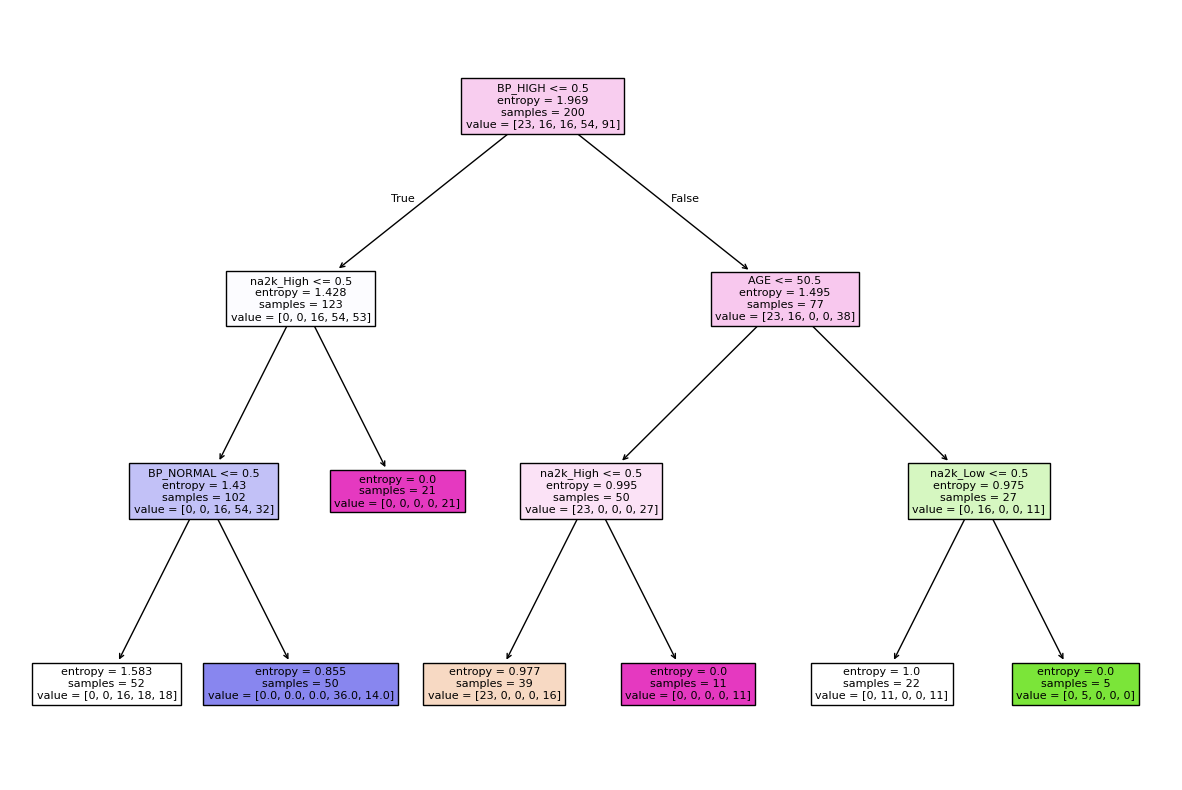

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,feature_names=X_train.columns, filled=True)

In [23]:
print(X_train.columns)

Index(['AGE', 'SEX_F', 'SEX_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
       'CHOLES_HIGH', 'CHOLES_NORMAL', 'na2k_Low', 'na2k_Medium', 'na2k_High',
       'na2k_VeryHigh'],
      dtype='object')


In [24]:
feature_names = list(X_train.columns)
print(tree.export_text(classifier, feature_names=feature_names))

|--- BP_HIGH <= 0.50
|   |--- na2k_High <= 0.50
|   |   |--- BP_NORMAL <= 0.50
|   |   |   |--- class: drugX
|   |   |--- BP_NORMAL >  0.50
|   |   |   |--- class: drugX
|   |--- na2k_High >  0.50
|   |   |--- class: drugY
|--- BP_HIGH >  0.50
|   |--- AGE <= 50.50
|   |   |--- na2k_High <= 0.50
|   |   |   |--- class: drugA
|   |   |--- na2k_High >  0.50
|   |   |   |--- class: drugY
|   |--- AGE >  50.50
|   |   |--- na2k_Low <= 0.50
|   |   |   |--- class: drugB
|   |   |--- na2k_Low >  0.50
|   |   |   |--- class: drugB



# Performance evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy score with criterion entropy: {accuracy:6f}')

Model accuracy score with criterion entropy: 0.714286


In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 0 2 0]
 [0 0 0 4 0]
 [0 1 0 1 1]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       0.75      1.00      0.86         3
       drugC       0.00      0.00      0.00         2
       drugX       0.57      1.00      0.73         4
       drugY       1.00      0.33      0.50         3

    accuracy                           0.71        14
   macro avg       0.66      0.67      0.62        14
weighted avg       0.68      0.71      0.64        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Propose your best model

In [27]:
for depth in range(3, 20):
    classifier = tree.DecisionTreeClassifier(max_depth = depth, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    print(f"Max Depth: {depth}, Accuracy Score: {score}")

Max Depth: 3, Accuracy Score: 0.7142857142857143
Max Depth: 4, Accuracy Score: 0.9285714285714286
Max Depth: 5, Accuracy Score: 0.9285714285714286
Max Depth: 6, Accuracy Score: 0.9285714285714286
Max Depth: 7, Accuracy Score: 0.9285714285714286
Max Depth: 8, Accuracy Score: 1.0
Max Depth: 9, Accuracy Score: 1.0
Max Depth: 10, Accuracy Score: 1.0
Max Depth: 11, Accuracy Score: 1.0
Max Depth: 12, Accuracy Score: 1.0
Max Depth: 13, Accuracy Score: 1.0
Max Depth: 14, Accuracy Score: 1.0
Max Depth: 15, Accuracy Score: 1.0
Max Depth: 16, Accuracy Score: 1.0
Max Depth: 17, Accuracy Score: 1.0
Max Depth: 18, Accuracy Score: 1.0
Max Depth: 19, Accuracy Score: 1.0


# Prediction of Unseen

In [28]:
# use depth = 4 instead

classifier = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
pred_unseen = classifier.predict(hot_unseen)
pred_unseen

array(['drugX', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX', 'drugA',
       'drugC', 'drugB', 'drugC', 'drugA', 'drugY', 'drugX', 'drugB'],
      dtype=object)

In [30]:
unseen['DRUG'] = pred_unseen
unseen

,AGE,SEX,BP,CHOLES,DRUG,na2k
0,57,M,LOW,NORMAL,drugX,Medium
1,49,F,NORMAL,NORMAL,drugX,Low
2,74,M,HIGH,HIGH,drugB,Low
3,49,M,LOW,NORMAL,drugX,Medium
4,65,F,HIGH,NORMAL,drugY,VeryHigh
5,53,M,NORMAL,HIGH,drugX,Medium
6,32,M,HIGH,NORMAL,drugA,Low
7,68,M,LOW,HIGH,drugC,Medium
8,68,F,HIGH,NORMAL,drugB,Medium
9,26,F,LOW,HIGH,drugC,Medium


End of Task.